In [199]:
from scipy.optimize import minimize

In [200]:
minimize?

Signature:
minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized.

        ``fun(x, *args) -> float``

    where ``x`` is a 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.
x0 : ndarray, shape (n,)
    Initial guess. Array of real elements of size (n,),
    where ``n`` is the number of independent variables.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (`fun`, `jac` and `hess` functions).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
        - 'Powell'      :ref:`(see here) <

In [201]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2 # objective function: (x - 1)^2 + (y - 2.5)^2
cons = ({'type': 'ineq', 'fun': lambda x: x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + x[1] + 2})
bnds = ((0, None), (0, None)) # bounds for x and y
result = minimize(f, (2, 0), constraints=cons, bounds=bnds)

In [202]:
result.x

array([1.4, 1.7])

In [203]:
## See the documentation 
minimize?

Signature:
minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized.

        ``fun(x, *args) -> float``

    where ``x`` is a 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.
x0 : ndarray, shape (n,)
    Initial guess. Array of real elements of size (n,),
    where ``n`` is the number of independent variables.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (`fun`, `jac` and `hess` functions).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
        - 'Powell'      :ref:`(see here) <

# `Interpolation`

### Plotting 

In [204]:
import numpy as np
import matplotlib.pyplot as plt

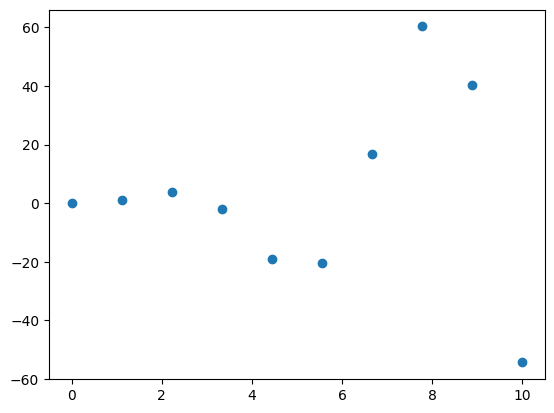

In [205]:
x = np.linspace(0, 10, 10)
y = x**2*np.sin(x)
plt.scatter(x, y)

In [206]:
#Interpolation: To see what is going on in the points between the data points (by using function)

In [207]:
from scipy.interpolate import interp1d

In [208]:
f = interp1d(x, y, kind='linear')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)


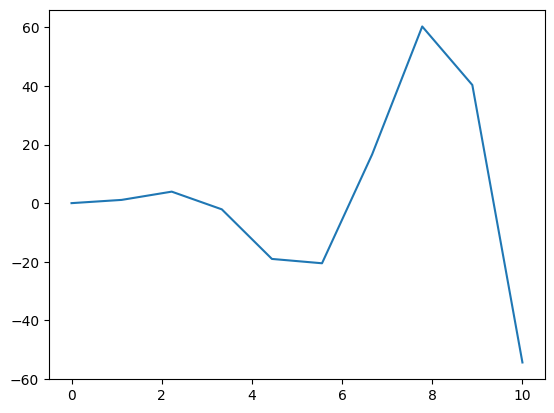

In [209]:
plt.plot(x_dense, y_dense)

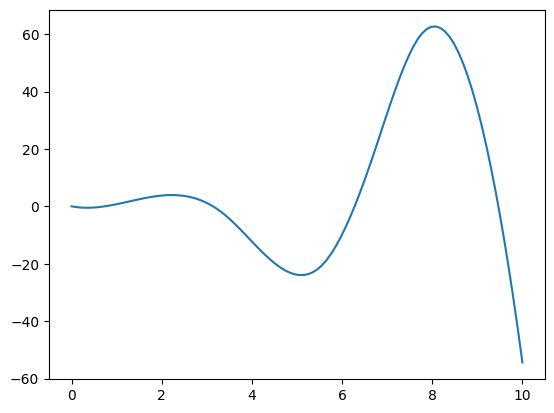

In [210]:
f = interp1d(x, y, kind='cubic')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)
plt.plot(x_dense, y_dense)

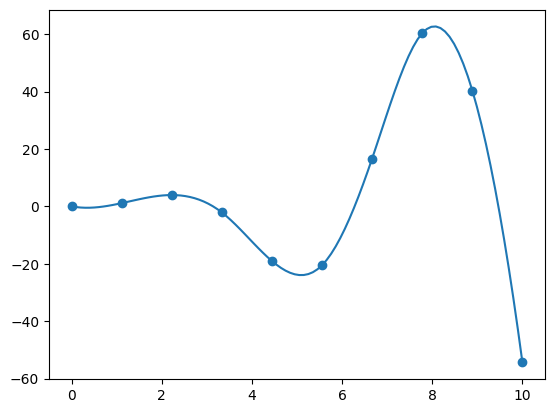

In [211]:
f = interp1d(x, y, kind='cubic')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)
plt.plot(x_dense, y_dense)
plt.scatter(x, y)

# `Curve Fitting`

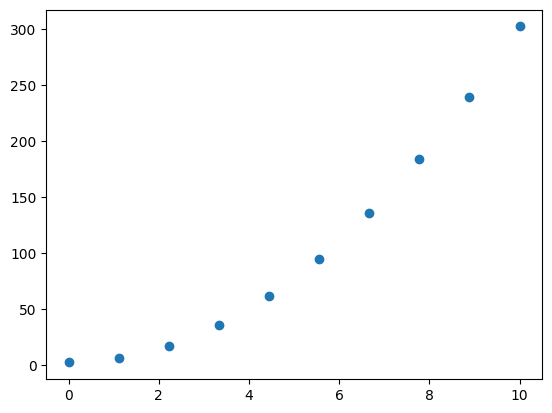

In [212]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2
plt.scatter(x_data, y_data)

In [213]:
from scipy.optimize import curve_fit
def func(x, a, b):
    return a*x**2 + b
popt, pcov = curve_fit(func, x_data, y_data, p0=(1, 1))
popt


array([3., 2.])

In [214]:
pcov #Covariance matrix of the parameters

array([[ 4.13297331e-34, -1.45419433e-32],
       [-1.45419433e-32,  9.65872308e-31]])

In [215]:
a, b = popt

In [216]:
a, b

(3.0, 1.9999999999999967)

In [217]:
t = np.linspace(0, 10, 100)
y = func(t, a, b)

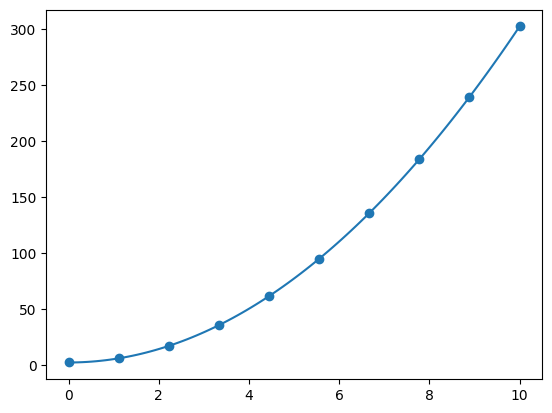

In [218]:
plt.scatter(x_data, y_data)
plt.plot(t, y)

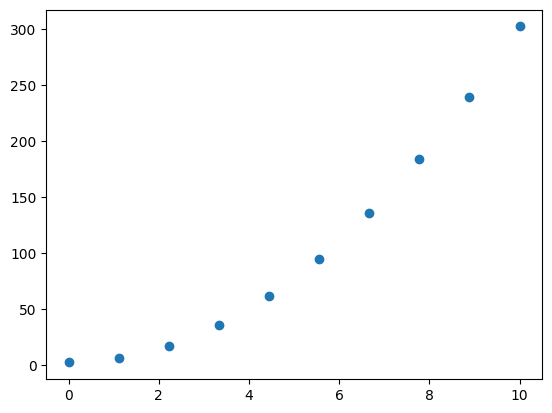

In [219]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2
plt.scatter(x_data, y_data)

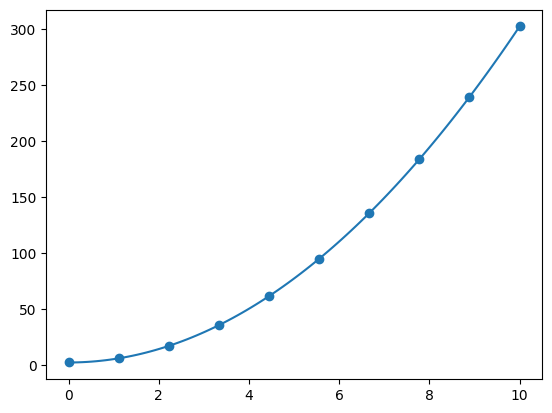

In [220]:
from scipy.optimize import curve_fit
def func(x, a, b):
    return a*x**2 + b
popt, pcov = curve_fit(func, x_data, y_data, p0=(1, 1))
a, b = popt
t = np.linspace(0, 10, 100)
y = func(t, a, b)
plt.scatter(x_data, y_data)
plt.plot(t, y)

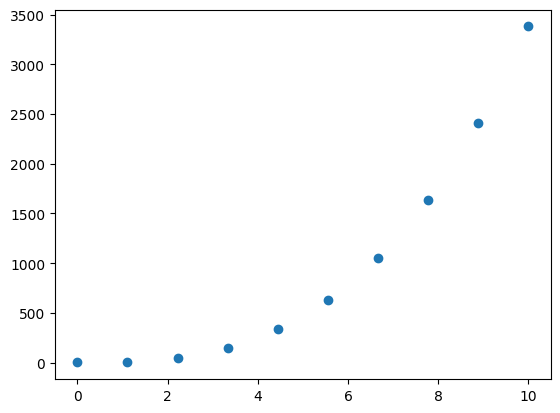

In [221]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**3 + 4*x_data**2 - 2*x_data + 1
plt.scatter(x_data, y_data)

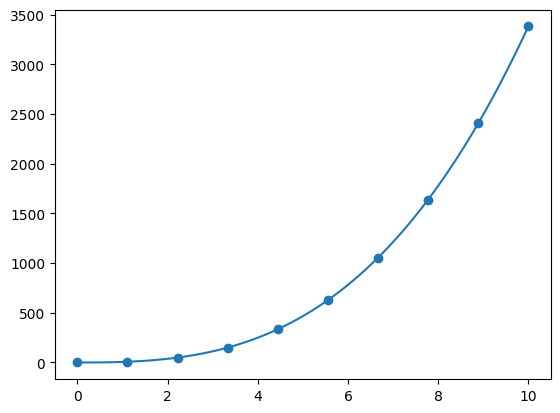

In [222]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a*x**3 + b*x**2 + c*x
popt, pcov = curve_fit(func, x_data, y_data, p0=(1, 1, 1)) # p0 is the initial guess for the parameters
a, b, c = popt
t = np.linspace(0, 10, 100)
y = func(t, a, b, c)
plt.scatter(x_data, y_data)
plt.plot(t, y)

# `Special Functions`

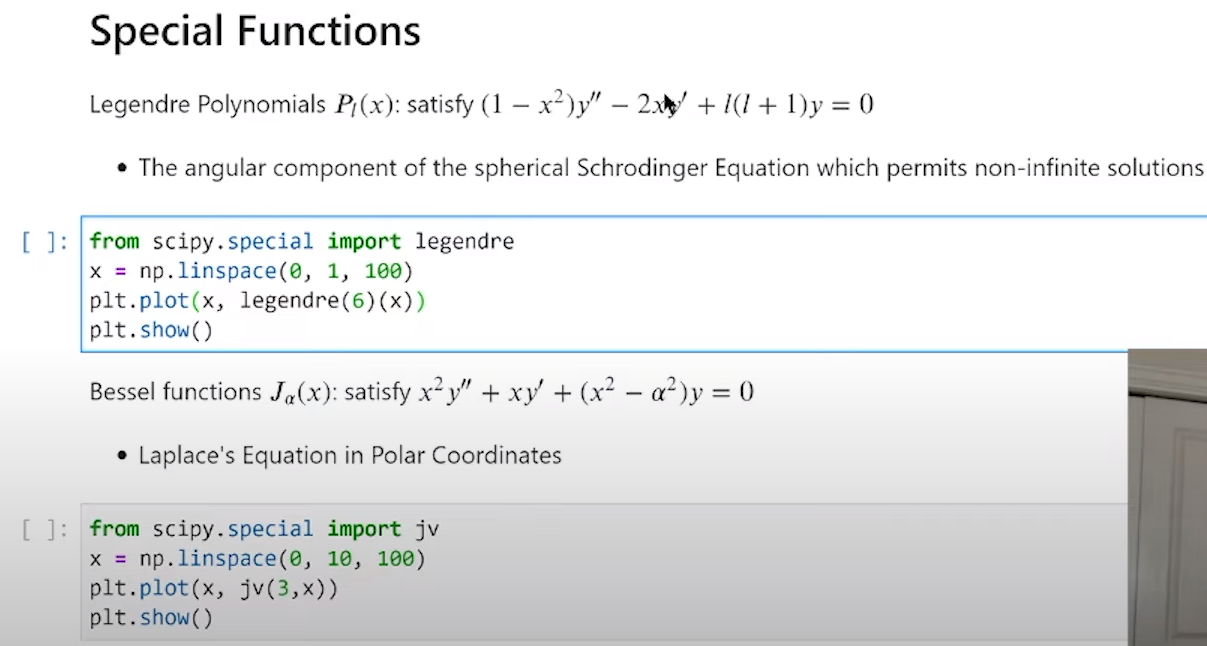

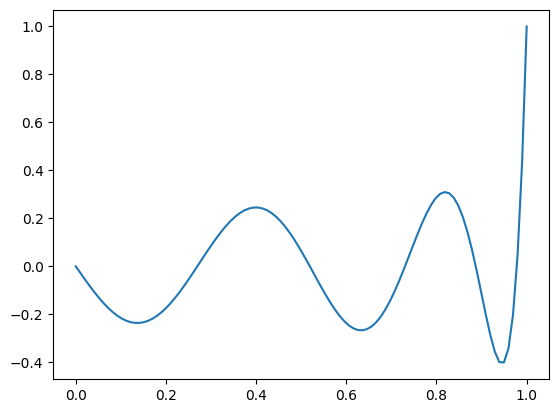

In [223]:
from scipy.special import legendre
x = np.linspace(0, 1, 100)
plt.plot(x, legendre(11)(x))
plt.show()

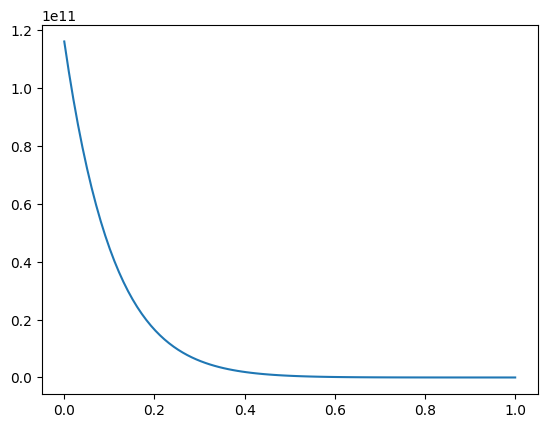

In [224]:
from scipy.special import legendre
x = np.linspace(0, 1, 100)
plt.plot(x, legendre(11)(x**2 - 5*x + 6))
plt.show()

In [225]:
legendre(6) # 6th order Legendre polynomial

poly1d([ 1.44375000e+01,  0.00000000e+00, -1.96875000e+01,  1.60288449e-15,
        6.56250000e+00,  0.00000000e+00, -3.12500000e-01])

In [226]:
legendre(6)(x) # 6th order Legendre polynomial evaluated at x

array([-0.3125    , -0.31183063, -0.30982498, -0.30649042, -0.30183921,
       -0.29588849, -0.28866022, -0.28018113, -0.27048269, -0.259601  ,
       -0.24757672, -0.234455  , -0.22028534, -0.20512149, -0.18902132,
       -0.17204669, -0.1542633 , -0.13574052, -0.1165512 , -0.09677155,
       -0.07648089, -0.05576147, -0.03469823, -0.01337862,  0.00810769,
        0.02966902,  0.05121194,  0.07264159,  0.09386188,  0.11477587,
        0.135286  ,  0.15529446,  0.17470346,  0.19341564,  0.21133433,
        0.228364  ,  0.24441054,  0.25938173,  0.27318756,  0.28574066,
        0.29695673,  0.30675493,  0.31505837,  0.32179447,  0.32689553,
        0.3302991 ,  0.33194851,  0.33179336,  0.32979001,  0.3259021 ,
        0.32010106,  0.31236669,  0.30268763,  0.29106199,  0.27749789,
        0.26201403,  0.24464031,  0.22541838,  0.20440232,  0.18165921,
        0.15726978,  0.13132908,  0.1039471 ,  0.07524946,  0.04537808,
        0.01449189, -0.01723251, -0.04960009, -0.08239669, -0.11

In [227]:
legendre(10) # 10th order Legendre polynomial

poly1d([ 1.80425781e+02, -4.00625713e-14, -4.27324219e+02, -2.80437999e-13,
        3.51914063e+02, -2.80437999e-13, -1.17304687e+02, -1.00156428e-14,
        1.35351562e+01,  5.47730467e-16, -2.46093750e-01])

### Laplace Equations in Polar Coordinates 

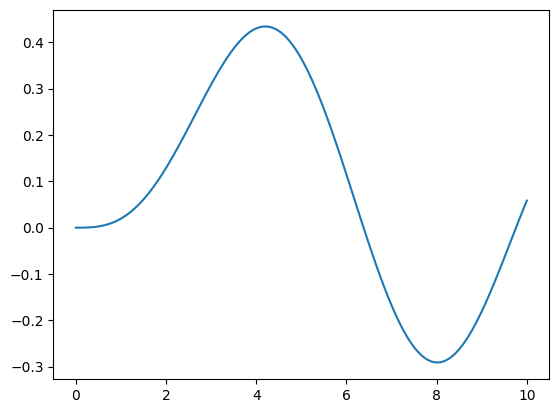

In [228]:
from scipy.special import jv 
x = np.linspace(0, 10, 100) 
plt.plot(x, jv(3, x))
plt.show()

# `Calculus`

In [229]:
from scipy.misc import derivative

In [230]:
def f(x):
    return x**2*np.sin(2*x)*np.exp(-x)
x = np.linspace(0, 1, 100)

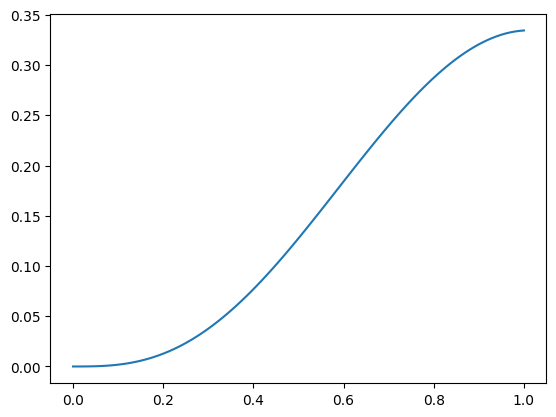

In [231]:
plt.plot(x, f(x))

### Derivative

In [232]:
derivative(f, x, dx = 1e-6)

C:\Users\netra\AppData\Local\Temp\ipykernel_13892\129215384.py:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivative(f, x, dx = 1e-6)


array([2.00000000e-12, 6.03920829e-04, 2.38251311e-03, 5.28577629e-03,
       9.26344114e-03, 1.42650411e-02, 2.02399819e-02, 2.71376096e-02,
       3.49072761e-02, 4.34984041e-02, 5.28605490e-02, 6.29434594e-02,
       7.36971364e-02, 8.50718897e-02, 9.70183930e-02, 1.09487737e-01,
       1.22431481e-01, 1.35801703e-01, 1.49551043e-01, 1.63632755e-01,
       1.78000746e-01, 1.92609622e-01, 2.07414723e-01, 2.22372164e-01,
       2.37438874e-01, 2.52572626e-01, 2.67732071e-01, 2.82876773e-01,
       2.97967232e-01, 3.12964916e-01, 3.27832284e-01, 3.42532814e-01,
       3.57031020e-01, 3.71292476e-01, 3.85283835e-01, 3.98972845e-01,
       4.12328366e-01, 4.25320382e-01, 4.37920015e-01, 4.50099539e-01,
       4.61832383e-01, 4.73093145e-01, 4.83857594e-01, 4.94102681e-01,
       5.03806534e-01, 5.12948470e-01, 5.21508990e-01, 5.29469779e-01,
       5.36813708e-01, 5.43524827e-01, 5.49588364e-01, 5.54990719e-01,
       5.59719457e-01, 5.63763301e-01, 5.67112124e-01, 5.69756939e-01,
      

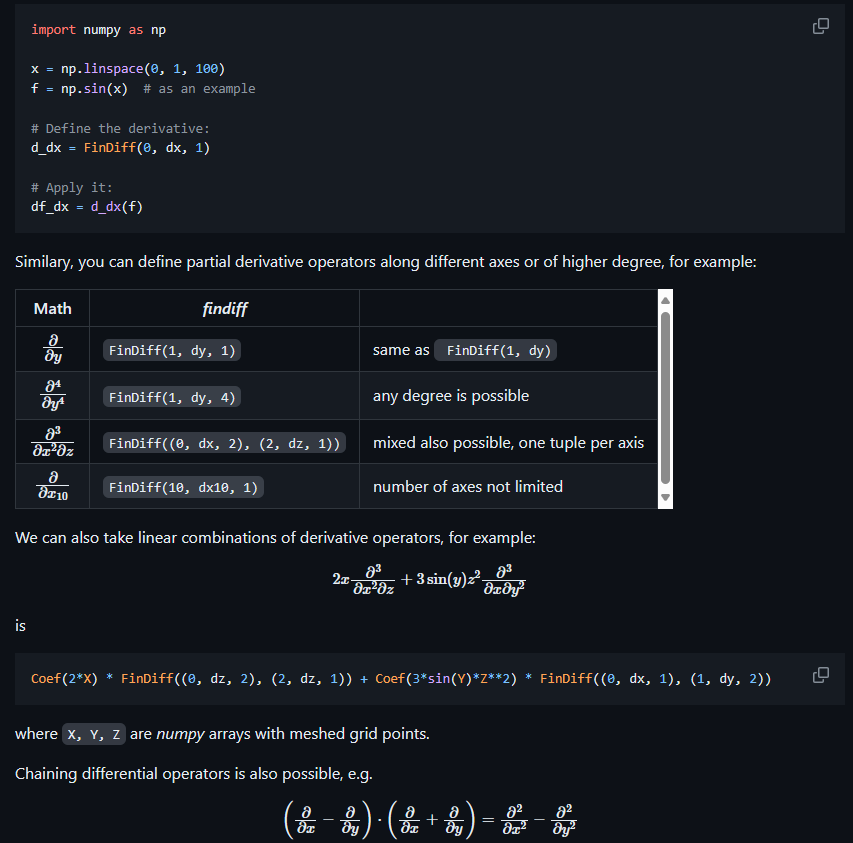

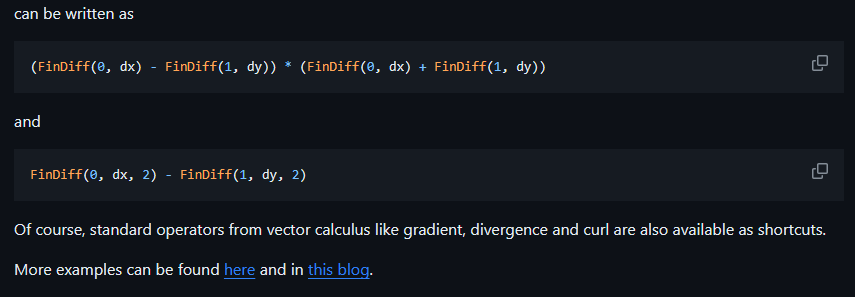

C:\Users\netra\AppData\Local\Temp\ipykernel_13892\240784270.py:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, derivative(f, x, dx = 1e-6))


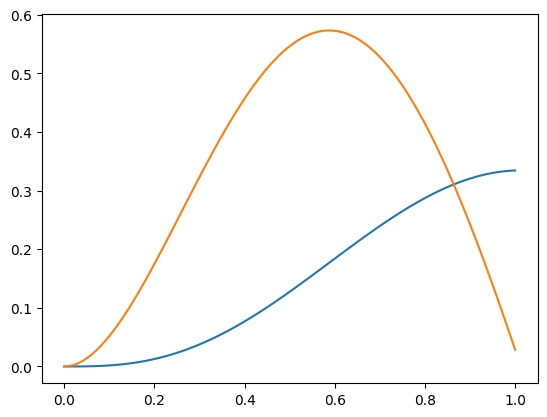

In [233]:
plt.plot(x, f(x))
plt.plot(x, derivative(f, x, dx = 1e-6))

C:\Users\netra\AppData\Local\Temp\ipykernel_13892\3599727904.py:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, derivative(f, x, dx = 1e-6))
C:\Users\netra\AppData\Local\Temp\ipykernel_13892\3599727904.py:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, derivative(f, x, dx = 1e-6, n = 2)) # 2nd derivative


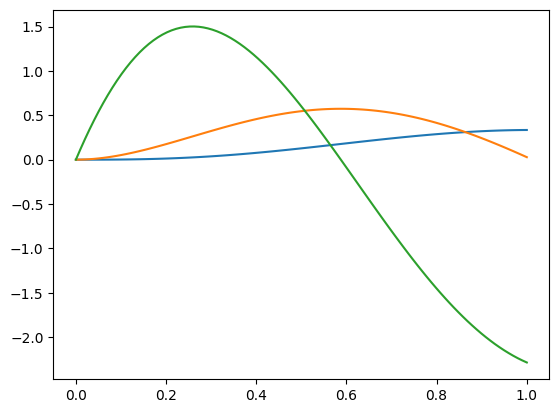

In [234]:
plt.plot(x, f(x))
plt.plot(x, derivative(f, x, dx = 1e-6))
plt.plot(x, derivative(f, x, dx = 1e-6, n = 2)) # 2nd derivative

C:\Users\netra\AppData\Local\Temp\ipykernel_13892\3599727904.py:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, derivative(f, x, dx = 1e-6))
C:\Users\netra\AppData\Local\Temp\ipykernel_13892\3599727904.py:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, derivative(f, x, dx = 1e-6, n = 2)) # 2nd derivative


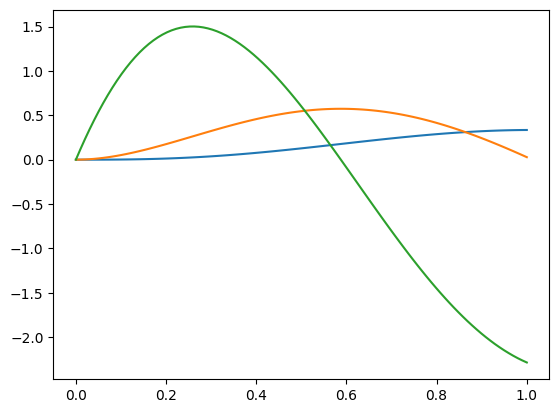

In [235]:
plt.plot(x, f(x))
plt.plot(x, derivative(f, x, dx = 1e-6))
plt.plot(x, derivative(f, x, dx = 1e-6, n = 2)) # 2nd derivative

# Inegration

In [236]:
from scipy.integrate import quad

In [237]:
integrand = lambda x: x**2*np.sin(2*x)*np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)
integral_error

1.6162822047366225e-15

In [238]:
integral

0.14558175869954834

### Double integral

In [239]:
from scipy.integrate import dblquad 
integrand = lambda x, y: np.sin(x+y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2 
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)
print(integral, integral_error)

0.315802507240474 1.5634600713498928e-14


In [240]:
quad?

Signature:
quad(
    func,
    a,
    b,
    args=(),
    full_output=0,
    epsabs=1.49e-08,
    epsrel=1.49e-08,
    limit=50,
    points=None,
    weight=None,
    wvar=None,
    wopts=None,
    maxp1=50,
    limlst=50,
    complex_func=False,
)
Docstring:
Compute a definite integral.

Integrate func from `a` to `b` (possibly infinite interval) using a
technique from the Fortran library QUADPACK.

Parameters
----------
func : {function, scipy.LowLevelCallable}
    A Python function or method to integrate. If `func` takes many
    arguments, it is integrated along the axis corresponding to the
    first argument.

    If the user desires improved integration performance, then `f` may
    be a `scipy.LowLevelCallable` with one of the signatures::

        double func(double x)
        double func(double x, void *user_data)
        double func(int n, double *xx)
        double func(int n, double *xx, void *user_data)

    The ``user_data`` is the data contained in the `scipy.LowLevelCa

# Differential Equation

### First Order ODEs

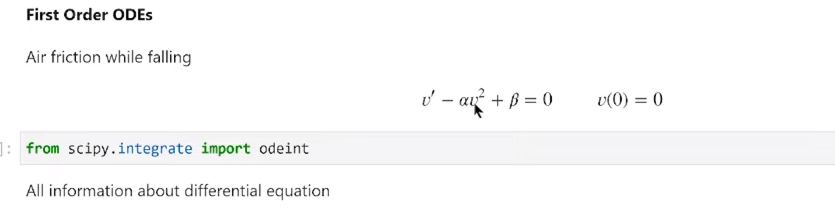

In [241]:
from scipy.integrate import odeint

In [242]:
def dvdt(v, t):
    return 3*v**2 - 5
v0 = 0 

In [243]:
t = np.linspace(0, 1, 100)
sol = odeint(dvdt, v0, t)

In [244]:
sol

array([[ 0.        ],
       [-0.05047933],
       [-0.10080451],
       [-0.15082334],
       [-0.20038726],
       [-0.24935318],
       [-0.29758502],
       [-0.34495519],
       [-0.39134576],
       [-0.43664948],
       [-0.48077056],
       [-0.52362515],
       [-0.56514164],
       [-0.60526086],
       [-0.6439356 ],
       [-0.68113064],
       [-0.71682205],
       [-0.75099661],
       [-0.78365109],
       [-0.8147914 ],
       [-0.84443176],
       [-0.87259378],
       [-0.89930556],
       [-0.92460079],
       [-0.94851787],
       [-0.97109913],
       [-0.99239002],
       [-1.01243837],
       [-1.03129376],
       [-1.04900692],
       [-1.06562918],
       [-1.081212  ],
       [-1.0958066 ],
       [-1.10946355],
       [-1.12223249],
       [-1.13416195],
       [-1.14529906],
       [-1.15568941],
       [-1.16537698],
       [-1.17440397],
       [-1.18281086],
       [-1.19063623],
       [-1.19791686],
       [-1.20468768],
       [-1.21098179],
       [-1

In [245]:
sol.T #Transpose

array([[ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
        -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
        -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
        -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
        -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
        -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
        -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
        -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
        -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
        -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
        -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
        -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
        -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
        -1.27512464, -1.2763122 , -1.27741137, -1.2

In [246]:
sol.T[0]

array([ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
       -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
       -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
       -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
       -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
       -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
       -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
       -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
       -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
       -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
       -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
       -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
       -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
       -1.27512464, -1.2763122 , -1.27741137, -1.27842865, -1.27

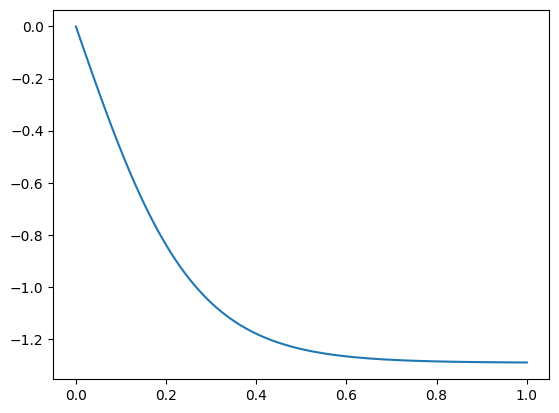

In [247]:
plt.plot(t, sol.T[0])

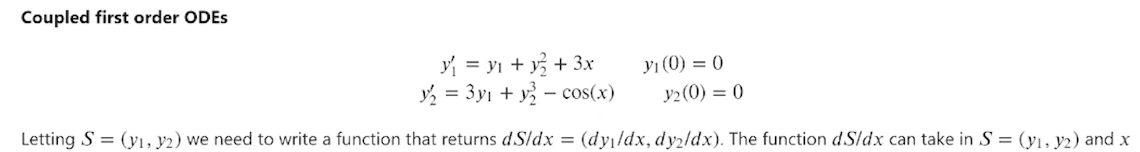

In [248]:
def dSdx(S, x):
    y1, y2 = S
    return [y1+y2**2+3*x, 
            3*y1+y2**3-np.cos(x)]
y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

In [249]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, S_0, x)
sol

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.53914061e-04, -1.00992734e-02],
       [ 6.19093356e-04, -2.01882005e-02],
       [ 1.40076628e-03, -3.02563164e-02],
       [ 2.50418953e-03, -4.02930766e-02],
       [ 3.93464633e-03, -5.02878361e-02],
       [ 5.69744401e-03, -6.02298432e-02],
       [ 7.79789517e-03, -7.01082428e-02],
       [ 1.02413187e-02, -7.99120712e-02],
       [ 1.30330245e-02, -8.96302498e-02],
       [ 1.61783065e-02, -9.92515816e-02],
       [ 1.96824391e-02, -1.08764749e-01],
       [ 2.35506573e-02, -1.18158303e-01],
       [ 2.77881638e-02, -1.27420669e-01],
       [ 3.24001125e-02, -1.36540133e-01],
       [ 3.73915921e-02, -1.45504834e-01],
       [ 4.27676179e-02, -1.54302762e-01],
       [ 4.85331404e-02, -1.62921756e-01],
       [ 5.46930282e-02, -1.71349495e-01],
       [ 6.12520553e-02, -1.79573493e-01],
       [ 6.82148995e-02, -1.87581095e-01],
       [ 7.55861308e-02, -1.95359467e-01],
       [ 8.33702071e-02, -2.02895598e-01],
       [ 9.

In [250]:
sol.T[0]

array([0.00000000e+00, 1.53914061e-04, 6.19093356e-04, 1.40076628e-03,
       2.50418953e-03, 3.93464633e-03, 5.69744401e-03, 7.79789517e-03,
       1.02413187e-02, 1.30330245e-02, 1.61783065e-02, 1.96824391e-02,
       2.35506573e-02, 2.77881638e-02, 3.24001125e-02, 3.73915921e-02,
       4.27676179e-02, 4.85331404e-02, 5.46930282e-02, 6.12520553e-02,
       6.82148995e-02, 7.55861308e-02, 8.33702071e-02, 9.15714669e-02,
       1.00194121e-01, 1.09242251e-01, 1.18719801e-01, 1.28630571e-01,
       1.38978219e-01, 1.49766252e-01, 1.60998020e-01, 1.72676732e-01,
       1.84805434e-01, 1.97387014e-01, 2.10424222e-01, 2.23919648e-01,
       2.37875730e-01, 2.52294784e-01, 2.67178978e-01, 2.82530347e-01,
       2.98350829e-01, 3.14642248e-01, 3.31406342e-01, 3.48644774e-01,
       3.66359140e-01, 3.84551013e-01, 4.03221942e-01, 4.22373488e-01,
       4.42007253e-01, 4.62124894e-01, 4.82728181e-01, 5.03819005e-01,
       5.25399429e-01, 5.47471735e-01, 5.70038442e-01, 5.93102385e-01,
      

# Second Order ODEs

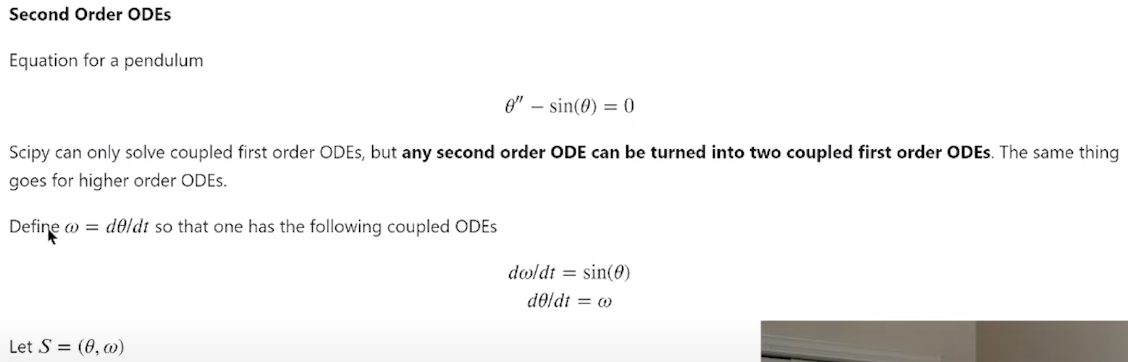

In [251]:
def dSdt(S, t):
    theta, omega = S
    return [omega, 
            np.sin(theta)]
theta0 = np.pi/4 
omega0 = 0
S0 = (theta0, omega0)

In [252]:
t = np.linspace(0, 20, 100)
sol = odeint(dSdt, S0, t)
theta, omega = sol.T

In [253]:
sol.T

array([[ 0.78539816,  0.79986207,  0.84366606,  0.91802008,  1.02483987,
         1.16655539,  1.34576295,  1.56465214,  1.8241588 ,  2.12288479,
         2.4560094 ,  2.81464874,  3.18620797,  3.55597383,  3.909537  ,
         4.23509027,  4.52473432,  4.77455111,  4.98380505,  5.15382323,
         5.28695896,  5.38581128,  5.45271189,  5.48942068,  5.49696242,
         5.47555266,  5.42458391,  5.34266614,  5.22773847,  5.07729222,
         4.88876634,  4.66018347,  4.39106169,  4.08352608,  3.74333932,
         3.38035106,  3.00785089,  2.64071279,  2.29290655,  1.97537606,
         1.69503381,  1.45494359,  1.25524424,  1.09427737,  0.96957062,
         0.87855116,  0.81900266,  0.78933015,  0.78869816,  0.8170886 ,
         0.87530193,  0.96490209,  1.08808262,  1.24740867,  1.44536988,
         1.68367901,  1.96229927,  2.27831737,  2.62500044,  2.99156934,
         3.36414856,  3.72785062,  4.06927009,  4.378384  ,  4.64925393,
         4.87961502,  5.06985915,  5.2219193 ,  5.3

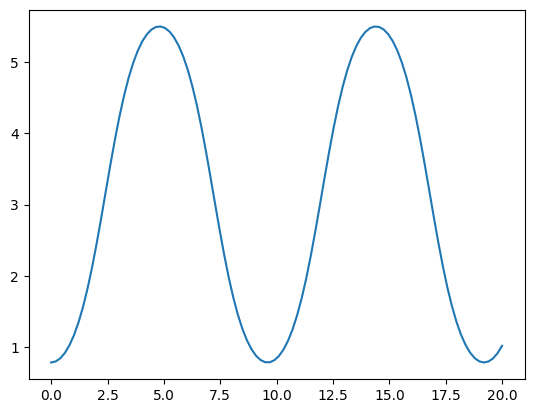

In [254]:
plt.plot(t, theta)
plt.show()

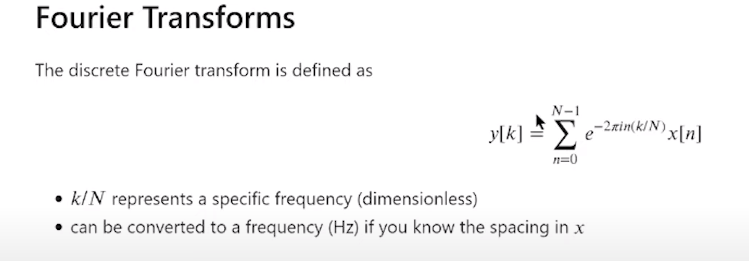

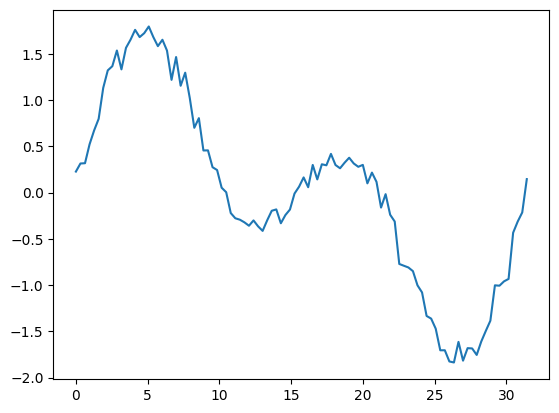

In [255]:
t = np.linspace(0, 10*np.pi, 100)
x = np.sin(2*np.pi*x) + np.sin(4*np.pi*x) + 0.1*np.random.randn(len(x))
plt.plot(t, x)

In [256]:
from scipy.fft import fft, fftfreq

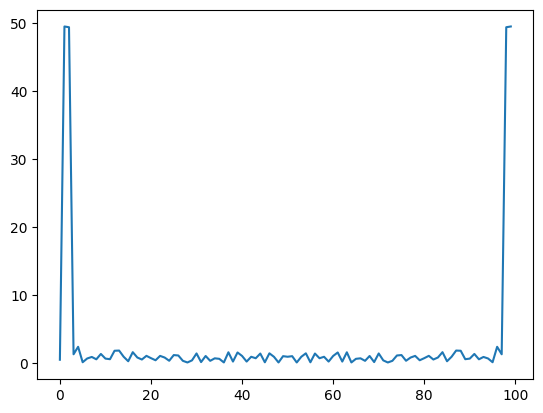

In [257]:
N = len(x)
y = fft(x)
plt.plot(np.abs(y))

In [258]:
np.diff(t)

array([0.31733259, 0.31733259, 0.31733259, 0.31733259, 0.31733259,
       0.31733259, 0.31733259, 0.31733259, 0.31733259, 0.31733259,
       0.31733259, 0.31733259, 0.31733259, 0.31733259, 0.31733259,
       0.31733259, 0.31733259, 0.31733259, 0.31733259, 0.31733259,
       0.31733259, 0.31733259, 0.31733259, 0.31733259, 0.31733259,
       0.31733259, 0.31733259, 0.31733259, 0.31733259, 0.31733259,
       0.31733259, 0.31733259, 0.31733259, 0.31733259, 0.31733259,
       0.31733259, 0.31733259, 0.31733259, 0.31733259, 0.31733259,
       0.31733259, 0.31733259, 0.31733259, 0.31733259, 0.31733259,
       0.31733259, 0.31733259, 0.31733259, 0.31733259, 0.31733259,
       0.31733259, 0.31733259, 0.31733259, 0.31733259, 0.31733259,
       0.31733259, 0.31733259, 0.31733259, 0.31733259, 0.31733259,
       0.31733259, 0.31733259, 0.31733259, 0.31733259, 0.31733259,
       0.31733259, 0.31733259, 0.31733259, 0.31733259, 0.31733259,
       0.31733259, 0.31733259, 0.31733259, 0.31733259, 0.31733

In [259]:
np.diff(t)[0]

0.3173325912716963

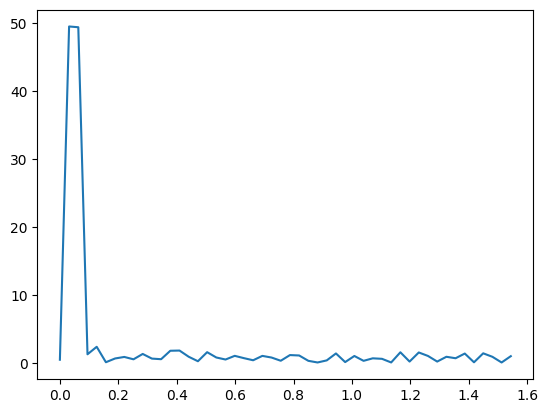

In [260]:
N = len(x)
y = fft(x)[:N//2]
f = fftfreq(N, np.diff(t)[0])[:N//2]
plt.plot(f, np.abs(y))

# Linear Algebra

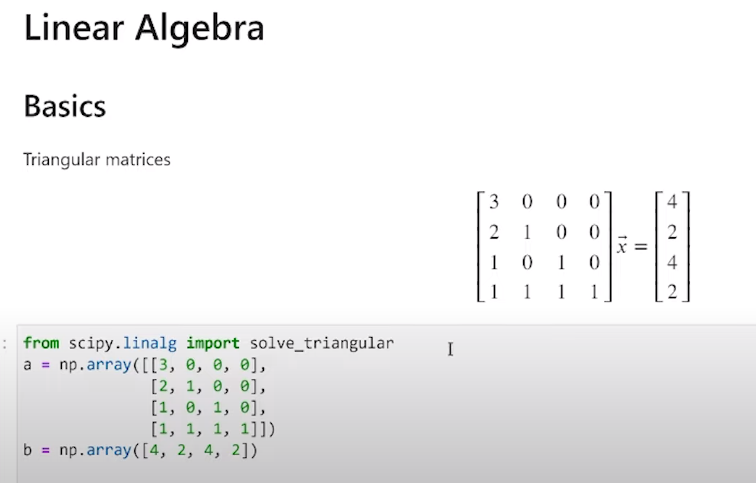

In [261]:
from scipy.linalg import solve_triangular 

In [262]:
a = np.array([[3, 0, 0, 0], 
              [2, 1, 0, 0], 
              [1, 0, 1, 0],
              [1, 1, 1, 1]])
b = np.array([4, 2, 4, 2])
x = solve_triangular(a, b, lower=True)
x

array([ 1.33333333, -0.66666667,  2.66666667, -1.33333333])

### Toeplitz Matrices (matrices with constant diagonals)

In [263]:
from scipy.linalg import solve_toeplitz, toeplitz

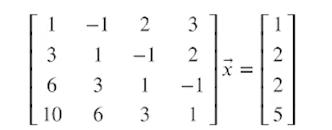

In [264]:
c = np.array([1, 3, 6, 10]) #First column of T 
r = np.array([1, -1, 2, 3]) #First Row of T 
b = np.array([1, 2, 2, 5]) #vector = constants 
x = solve_toeplitz((c, r), b)
x

array([ 0.17741935,  0.48387097, -0.0483871 ,  0.46774194])

# Eigenvalue Problems 

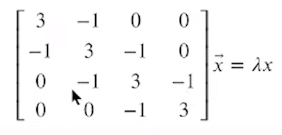

In [265]:
from scipy.linalg import eigh_tridiagonal

In [266]:
d = 3*np.ones(4)
e = -1*np.ones(3)
w, v = eigh_tridiagonal(d, e)
w #Eigen Values

array([1.38196601, 2.38196601, 3.61803399, 4.61803399])

In [267]:
w[0]

1.3819660112501053

In [268]:
#vector 
v

array([[ 0.37174803,  0.60150096,  0.60150096,  0.37174803],
       [ 0.60150096,  0.37174803, -0.37174803, -0.60150096],
       [ 0.60150096, -0.37174803, -0.37174803,  0.60150096],
       [ 0.37174803, -0.60150096,  0.60150096, -0.37174803]])

In [269]:
v.T

array([[ 0.37174803,  0.60150096,  0.60150096,  0.37174803],
       [ 0.60150096,  0.37174803, -0.37174803, -0.60150096],
       [ 0.60150096, -0.37174803, -0.37174803,  0.60150096],
       [ 0.37174803, -0.60150096,  0.60150096, -0.37174803]])

In [270]:
v.T[0]

array([0.37174803, 0.60150096, 0.60150096, 0.37174803])

In [271]:
A = np.diag(d) + np.diag(e, k = 1) + np.diag(e, k=-1)
a

array([[3, 0, 0, 0],
       [2, 1, 0, 0],
       [1, 0, 1, 0],
       [1, 1, 1, 1]])

In [273]:
A@v.T[1] #Eigenvalues 

array([ 1.43275483,  0.88549118, -0.88549118, -1.43275483])

In [275]:
#Checking the equality 
w[1]*v.T[1] #First eigenvalues

array([ 1.43275483,  0.88549118, -0.88549118, -1.43275483])

# Statistics

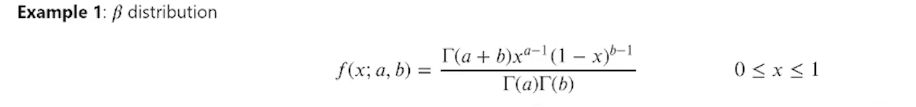

In [276]:
from scipy.stats import beta

### Basics Statistics 

In [277]:
a, b = 2.5, 3.1
mean, var, skew, kurt = beta.stats(a, b, moments = 'mvsk')

In [278]:
mean

0.44642857142857145

In [279]:
var

0.03744395485466914

In [280]:
skew

0.14570980275128334

In [281]:
kurt

-0.6695305405298693

## Probabiblity Distribution Plotting 

In [282]:
beta.ppf?

Signature: beta.ppf(q, *args, **kwds)
Docstring:
Percent point function (inverse of `cdf`) at q of the given RV.

Parameters
----------
q : array_like
    lower tail probability
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
x : array_like
    quantile corresponding to the lower tail probability q.
File:      e:\python\myenv\lib\site-packages\scipy\stats\_distn_infrastructure.py
Type:      method

In [283]:
beta.ppf(0.5, a, b)

0.43963069154804346

In [284]:
beta.ppf(0.99, a, b)

0.871845893864339

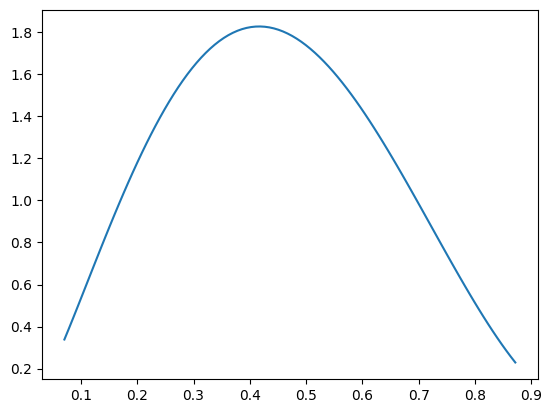

In [285]:
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
plt.plot(x, beta.pdf(x, a, b))

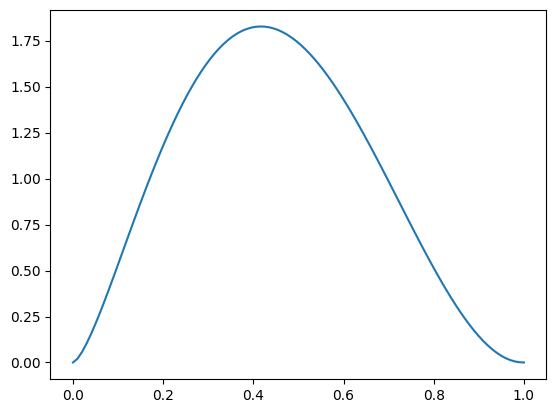

In [286]:
x = np.linspace(beta.ppf(0, a, b), beta.ppf(1, a, b), 100)
plt.plot(x, beta.pdf(x, a, b))

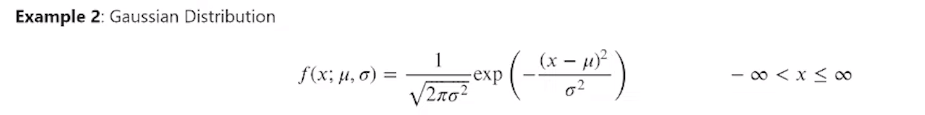

In [291]:
from scipy.stats import norm
mu = 1
sigma = 2
mean, var = norm.stats(loc=mu, scale = sigma, moments = 'mv')
print(mean, "and", var)

1.0 and 4.0


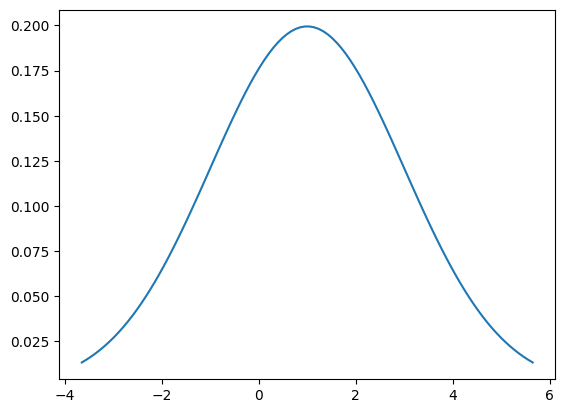

In [294]:
x = np.linspace(norm.ppf(0.01, mu, sigma), norm.ppf(0.99, mu, sigma), 100)
plt.plot(x, norm.pdf(x, mu, sigma))